# Drone stabilizing itself under wind disturbance

In [1]:
import numpy as np
import quadrotor
import matplotlib.pyplot as plt

# Function to linearize the dynamics of the drone.
def get_linearlization(z,u):
    A = np.array([[1,quadrotor.DELTA_T,0,0,0,0],[0,1,0,0,-quadrotor.DELTA_T*(u[0]+u[1])*np.cos(z[4])/quadrotor.MASS,0],[0,0,1,quadrotor.DELTA_T,0,0],[0,0,0,1,-quadrotor.DELTA_T*(u[0]+u[1])*np.sin(z[4])/quadrotor.MASS,0],[0,0,0,0,1,quadrotor.DELTA_T],[0,0,0,0,0,1]])
    B = np.array([[0,0],[-quadrotor.DELTA_T*np.sin(z[4])/quadrotor.MASS,-quadrotor.DELTA_T*np.sin(z[4])/quadrotor.MASS],[0,0],[quadrotor.DELTA_T*np.cos(z[4])/quadrotor.MASS,quadrotor.DELTA_T*np.cos(z[4])/quadrotor.MASS],[0,0],[quadrotor.DELTA_T*quadrotor.LENGTH/quadrotor.INERTIA,-quadrotor.DELTA_T*quadrotor.LENGTH/quadrotor.INERTIA]])
    return A,B

In [2]:
# Linear Quadratic Regulator
def stable_LQR_controller(state,i):
    # Set origin points
    z_origin = np.zeros([quadrotor.NUMBER_STATES])
    u_rest = np.array([quadrotor.MASS*quadrotor.GRAVITY/2, quadrotor.MASS*quadrotor.GRAVITY/2])
 
    A,B = get_linearlization(z_origin,u_rest)
    
    # Cost matrix for state
    multi = 600
    Q = multi*np.identity(quadrotor.NUMBER_STATES)
    Q[1,1]=multi
    Q[3,3]=multi
    Q[4,4]=1
    Q[5,5]=1
    
    # Control cost matrix
    R = 0.1*np.identity(quadrotor.NUMBER_CONTROLS)
    
    P_prev = Q 
    #solve Riccati recursion
    for i in range(1000):
        
        Kn = -np.linalg.inv(B.transpose()@P_prev@B+R)@B.transpose()@P_prev@A
        
        Pn = Q+A.transpose()@P_prev@A + A.transpose()@P_prev@B@Kn  
        
        P_prev = Pn
        
        K = Kn
    
    
    u_stabilize = K@(state-z_origin)

    u_original = u_stabilize + u_rest
    
    return u_original

Text(0.5, 0, 'Time [s]')

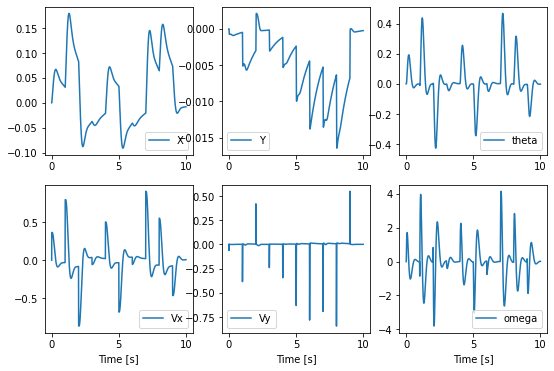

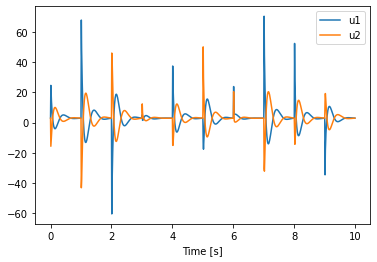

In [3]:
# Plot the resuts
horizon_length = 1000
z0 = np.zeros([quadrotor.NUMBER_STATES,])

# Set disturbance = False for NO wind
t, state, u = quadrotor.simulate(z0, stable_LQR_controller, horizon_length, disturbance = True)
# we can plot the results
plt.figure(figsize=[9,6])

plt.subplot(2,3,1)
plt.plot(t, state[0,:])
plt.legend(['X'])

plt.subplot(2,3,2)
plt.plot(t, state[2,:])
plt.legend(['Y'])

plt.subplot(2,3,3)
plt.plot(t, state[4,:])
plt.legend(["theta"])

plt.subplot(2,3,4)
plt.plot(t, state[1,:])
plt.legend(['Vx'])
plt.xlabel('Time [s]')

plt.subplot(2,3,5)
plt.plot(t, state[3,:])
plt.legend(['Vy'])
plt.xlabel('Time [s]')

plt.subplot(2,3,6)
plt.plot(t, state[5,:])
plt.legend(['omega'])
plt.xlabel('Time [s]')

# we can also plot the control
plt.figure()
plt.plot(t[:-1], u.T)
plt.legend(['u1', 'u2'])
plt.xlabel('Time [s]')

In [4]:
# Animate the results
quadrotor.animate_robot(state, u)

<source type="video/mp4" src="data:video/mp4;base64,AAAAIGZ0eXBNNFYgAAACAE00ViBpc29taXNvMmF2YzEAAAAIZnJlZQAAUzVtZGF0AAACoQYF//+d
3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2MSAtIEguMjY0L01QRUctNCBBVkMgY29kZWMg
LSBDb3B5bGVmdCAyMDAzLTIwMjAgLSBodHRwOi8vd3d3LnZpZGVvbGFuLm9yZy94MjY0Lmh0bWwg
LSBvcHRpb25zOiBjYWJhYz0xIHJlZj0zIGRlYmxvY2s9MTowOjAgYW5hbHlzZT0weDM6MHgxMTMg
bWU9aGV4IHN1Ym1lPTcgcHN5PTEgcHN5X3JkPTEuMDA6MC4wMCBtaXhlZF9yZWY9MSBtZV9yYW5n
ZT0xNiBjaHJvbWFfbWU9MSB0cmVsbGlzPTEgOHg4ZGN0PTEgY3FtPTAgZGVhZHpvbmU9MjEsMTEg
ZmFzdF9wc2tpcD0xIGNocm9tYV9xcF9vZmZzZXQ9LTIgdGhyZWFkcz0xMiBsb29rYWhlYWRfdGhy
ZWFkcz0yIHNsaWNlZF90aHJlYWRzPTAgbnI9MCBkZWNpbWF0ZT0xIGludGVybGFjZWQ9MCBibHVy
YXlfY29tcGF0PTAgY29uc3RyYWluZWRfaW50cmE9MCBiZnJhbWVzPTMgYl9weXJhbWlkPTIgYl9h
ZGFwdD0xIGJfYmlhcz0wIGRpcmVjdD0xIHdlaWdodGI9MSBvcGVuX2dvcD0wIHdlaWdodHA9MiBr
ZXlpbnQ9MjUwIGtleWludF9taW49MTAgc2NlbmVjdXQ9NDAgaW50cmFfcmVmcmVzaD0wIHJjX2xv
b2thaGVhZD00MCByYz1jcmYgbWJ0cmVlPTEgY3JmPTIzLjAgcWNvbXA9MC42MCBxcG1pbj0wIHFw
bWF4PTY5IHFwc3RlcD00IGlwX3JhdGlvPTEuNDAgYXE9MToxLjAwAIAAAA2qZYiEABH//veIHzLL
afk613IR560urR9Q7kZxXqS9/iAAAAMAAAMAAOSq/2+9Zj+im+AAABXQArISJA0agX3rQrxAFVDm
jgk//Zy6/Zkysf1BBlzSMecs0adU4czxdWu3ATn6Hlfa1lvTJVwFeJzzgStuUpMltOrgd3xiXeRy
NijQbA3SBfm/fv33UGxcJxjDaZrIZWJfsESDGQ+3B//+mxNP94N7yss6aV0xf5e1Y3eMSRhlnOEg
5t6laqwn4ehgEZ2RN/0//u4oRdcLYjvj7rDRnH5cb7OVciDfJYGaozXslbZ10FWoZD+wa9RoM7Vh
Kvs9+i1CJOM1E9yhd9nJgVUlfLwzC1Za3ShQ/LETwzwShYB2lXhEBNtv+7NUYSCSDRFn6LN7o1AJ
QAEdau2JSrmA4QHdGzq22xhgv8mmewJcQBfZy64FtyEIrx8SYw7kA+KnNLkao75McnTlB/5i7dqf
IpuXi2M09cR6RF+Z3jQHe0GqpwUYfFpfayNBkykv+FLMd+xF01cmL9O+j4ngxn6se3FNYcztZ8FP
oDZ7Hdni0PpsBeTMRy7cKd8ofY/h2QaGmxj9CTmjWcKqLboendpI3ZDIiv2cEAuM6MaeQUQXi6OC
iXNtkuQmr/j2N3oUOrQCrll/WWSC6ui3+Z7Rilp3zCpztTuUCfBJZ/d2m1+7nnrW6Df5akPjhe+U
SPr3OxWw7ojl1qCOT2PP99CQJh+M8DRyFgPvRmaSw0Q3Nkem3vbetIePt3nvRDMiXKB+Hp/9qXz5
xf98BOuZRAQs9/UF5+xXW3YBpAltyVWY2mdz7lwRot3ZHDmmeFPRLJ0AABQA6AS+USEwgYAVYWcg
evAF2IrEcVC74uGXM0tH3T1lulnQAaIGzFTzra+Y7DJ85krpALasygjFVvS/o8wvUmQWf+XpyTIQ
lfgfS8zYm00FYv/L1FpCA1kWspEEhshs8tqnJ3fhx0mkNvwhP62j5bYb1oenPXqO6/94JRaFAOY3
0b22S3xzPykKHWjieHS7mQiR2zXuuV/tT4GcCI4OGOLv0K5u1TZ4QYZ3I0W0j8qZNh/2QBQhIzR0
7nyKfDevZw6bYq+vgKzYM05CS3bb2BUBkdz1HIsRF1qf0p74RsgCr/96Lwfq2L8e6QRhh1BjZ/Cc
7Le7SNnSAUO1fxUgBTQ9KPNaIbPlAzGJpKyR33mRX+oIFPZuFYAAAAMBsYKpfksfnQyZJkDzCssN
jp59+/MUE50bv0FurP1Df7WuSdCmxBkwhU/J5qzpyx4jHbJSBwDLB2MPHmHFB/+tZ5rJuhYsc6Uf
Bdhkob2wy+5hfrvjmtDkEJO1cyxDQK0c/+JPbO9iOprQzwRnsSJq0UXWCAEyPxzO9n0NXWdzseo5
IQZPYgE//PiLgsAjs7RaeJ902IviwivRvVBkKuNmjgvIH6vjI8/vroNY8cQWwPiBqRGvZ0yism3T
NLSo1ogqDmvKRx2YlG7Q3Ol5/uKXpgD61e4l8aP//lfEHwlg1TneRzS9QWtZCe7z81TnXtklO49P
+6b8rtZH1j57PebTXCQejKq8GASKDyuarc0pWnhDzGpkYaAAAAMAAFtsdjQFnVV7LWhFbeqAXNqw
0xaayfWkzm2LOGkNttkrVO23993x1bveWyxXHvof5AtOa7J2fXJEWzz+B2QYQDXhPf/GnLSUxiHW
YaX5C2bmDGEpqFk558MsKjYAXUijnfFDSq4HkpJusWo2DNGWh/d/HLRch4WhJN9oHlXEE71StnMu
ObeFI++iL8uzfezQRLuXJQhN6/xbZXetG9VjcPfPn+jBlWMsjEwL5WiLiJbSAfQp/8YW5YZl/twT
6l/Q1fEUOXQgrT4Gfbq4khHQ1LF0Isxek/OM99cEkDkxYfHja1hZfzlsvI9J3BDqeLt4qtYt7SO/
asghxtuD4BPE3ZJJBLHV076pKq+S4QE4rP0r+XQgB9qta5KRdNQlW+YZ0vCNggCtMSMC6g4aVlyH
Qr2ROYIu2MH///+P6ZzUfbt82ihKKKu1x2wXRf+g73CdVl06L/IvXiWPxO2f8Rewl4vjZCympHRq
fwSxSU5JAEmh7x82w6Yw3q5uAN/YwACaNNFd13QyTb3kYng1/l891PnyhZSeVIxUBoRB1/qUZtTc
r67W1Bf4tEy3teL5gYZj1XnsUDH8Z4QwEGek+fqfSzP3OQtNfTEakS5xtPj+nq1cPaE/UFZMEL4z
zwm6lAAC74AARRob6XMFrCYmKeqnY/cOHTyLqB/cBKRxKWbTUFVHM1kCp657thV8/Ec0lF/HUe4a
ia8mCdl1mHcjGxF8rZx4U/UXd+C6TcYeC4rVICO6VSUEcRPNUGlKtHiIbJmivVcOg53OEsjqw9/P
8xEgNbOR0Vx/VdaVZLAlWwNMhQPXLMjw+RsX0zT6KVVz8ON1MyEstFr+5X20e0E6TZwQ4vWK5oLx
9JFGbWKvj5mJebPHptBv8gf0BaRwCtbL5P/+9ysDjt7cbs8YKYYB+lsmRsInyXNyGzsSjKBS0eK4
F1TZ/HwWwl8kvJimEKB4AIHiCL51BUuvxb5VEwXl2sAAFdJ6awAAAwF2IrfuygKw6qwhrMptQLXV
VF0X+45+13euSTjoWWdvWpDUvvrnMBBc023tvsFC9INSjGWA5nAUKzAdh1HqiRkV2L6jN7M8MxLO
Z2MYmyD9aepQha1+Zq5s2ocIOhDDmVAguocucAAARuoyxshVzDhjt/tm6VaJnB3rR5DQkqd/wUvx
edD/zaJSm0ek1o9wLuav1QN5DOR0P4ED34A+yY4r4autbMjWJrDAecJ7JrQM2PNB9cNwBl1YLmrI
6h3uQnVxLf9AJGDuoYpWGE83xRwNT6fiGOcsvD0e40S0Zf9Rs9/z8gwAAAMAKLslEpUF0E0fo5mF
1DCnMmuFy/1CEiOAL9g9c